In [137]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from scipy.stats import binom
from typing import Callable
from scipy.optimize import curve_fit
from scipy.special import comb

sns.set()

def copy_doc(copy_func: Callable) -> Callable:
    """Use Example: copy_doc(self.copy_func)(self.func) or used as deco"""
    def wrapper(func: Callable) -> Callable:
        func.__doc__ = copy_func.__doc__
        return func
    return wrapper

In [2]:
n = 5000
p = 0.1
nodes = range(n)
eges_nr = np.sum([i for i in range(n)])
all_edges = np.array([[i, j] for i in range(n-1) for j in range(i+1,n) ])
taked_edes = np.random.uniform(size=eges_nr)<p
edges_to_add = all_edges[taked_edes]
eges_nr, all_edges
g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges_to_add)

options = {
    'node_size': 10,
    "font_size": 10,
    'width': 1}
# nx.draw(g, with_labels=True, **options)

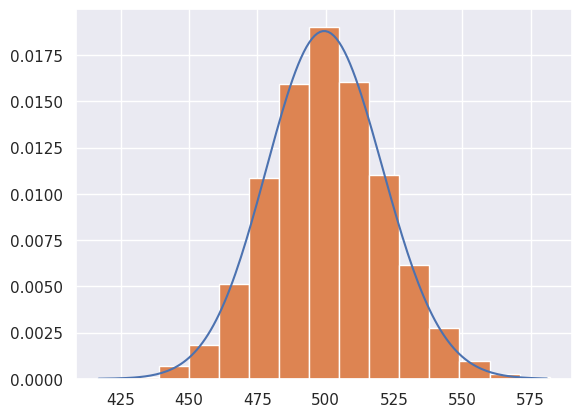

In [3]:
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  # degree sequence
xs = np.arange(min(degree_sequence), max(degree_sequence),1)
plt.plot(xs, binom(n-1,p).pmf(xs))
plt.hist(degree_sequence, density= True, bins = 15)    
plt.show()


In [4]:
np.mean(degree_sequence), np.var(degree_sequence)


(500.1992, 461.4079193600001)

# Watts-Strogatz model

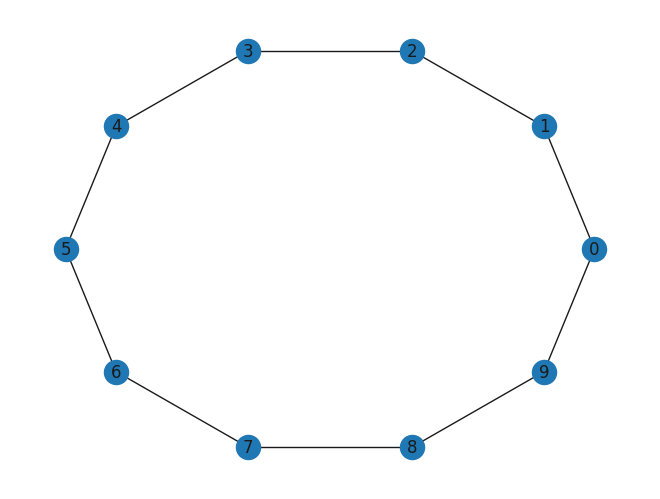

In [4]:
n = 10
k = 2

g2 = nx.Graph()
for i in range(n):
     for j in range(1, k // 2 + 1):
        g2.add_edge(i, (i+j)%n)
nx.draw_circular(g2, with_labels = True)

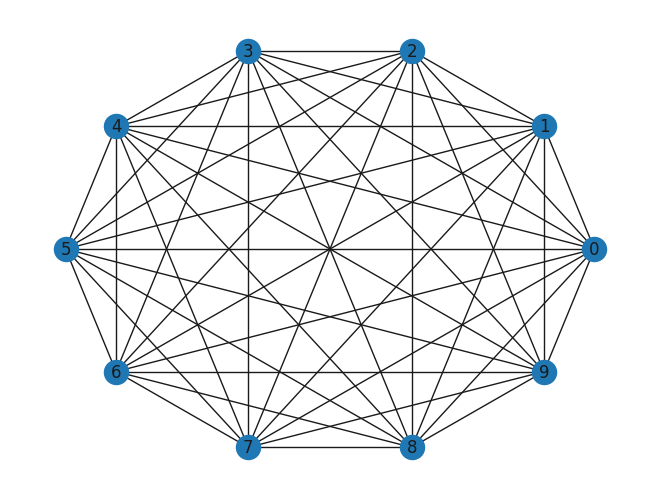

In [3]:
class Graph(nx.Graph):
    
    def Watts_Strogatz_model(self, n , k, p):
        """Returns a Watts–Strogatz small-world graph.

        Parameters
        ----------
        n : int
            The number of nodes
        k : int
            Each node is joined with its `k` nearest neighbors in a ring
            topology.
        p : float
            The probability of rewiring each edge
        """
        if k>n:
            raise ValueError(f"The parameter 'k' = {k} is greater than parametr 'n' = {n}")
        elif k == n:
            return nx.complete_graph(n)
        g = nx.Graph()
        g.add_nodes_from(range(n))
        
        nodes = g.nodes
        for i in range(n):
            for j in range(1, k // 2 + 1):
                g.add_edge(i, (i+j)%n)
                
        for node in nodes:
            for neighbour in range(1, k // 2 + 1):
                if np.random.uniform() < p:
                    random_note = np.random.choice(nodes)
                    while node == random_note or g.has_edge(node, random_note):
                        random_note = np.random.choice(nodes)
                    else:
                        g.remove_edge(node, (node + neighbour)%n)
                        g.add_edge(node, random_note)
                else:
                    pass
        return g
    
n = 10
p = 1
g2 = Graph().Watts_Strogatz_model(n, 10, 1)
nx.draw_circular(g2, with_labels = True)

AttributeError: 'NoneType' object has no attribute 'random'

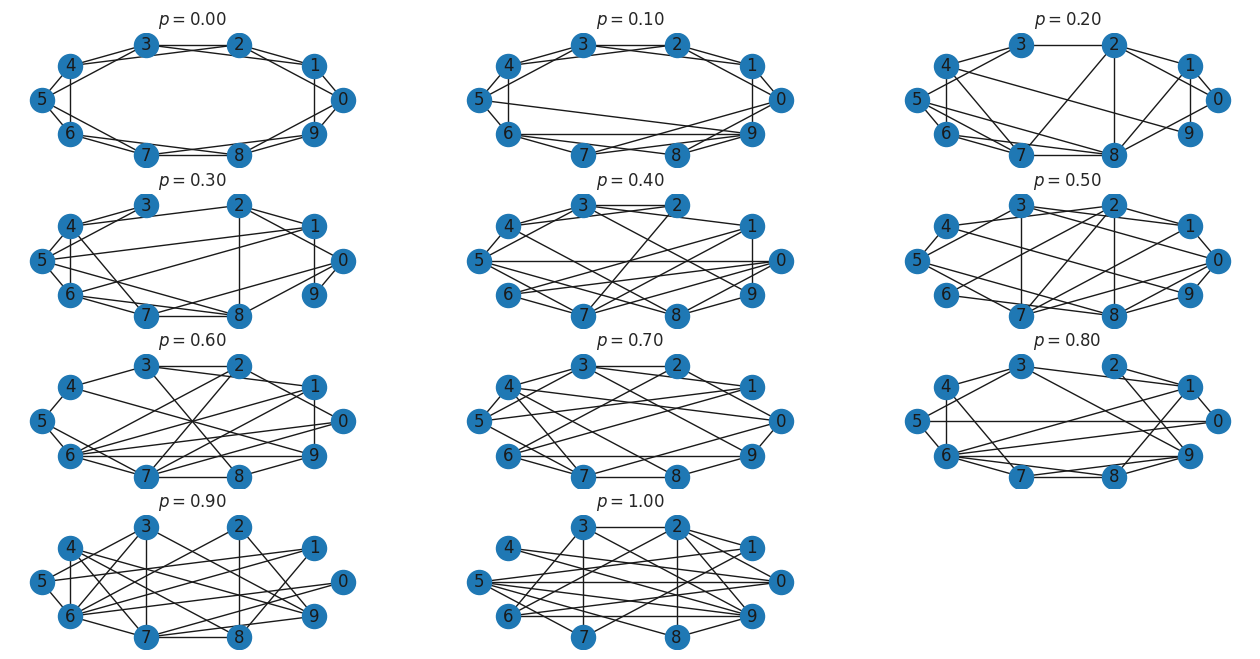

In [208]:
bvals = np.linspace(0,1,11)
N = 10
K = 4
plt.figure(figsize=(16,8))
for m, b in enumerate(bvals):
    plt.subplot(4,3,m+1)
    g2 = Graph().Watts_Strogatz_model(10, 4, b)
    plt.title(r"$p = %.2f$"%b)
    nx.draw_circular(g2, with_labels = True)

In [138]:
# def _density(k, K, p):
    
#     pk = 0
#     for n in range(int(min(k - K/2, K/2)+1)):
#         pk += comb(K/2, n )*(1-p)**n*p**(K/2-n)*(p*K/2)**(k-n-K/2)/np.math.factorial(int(k-n-K/2))*np.math.exp(-K/2*p)
#     return pk

# def density(ks, K, p):
    
#     return [_density(k, K, p ) for k in ks]



In [245]:
def _density(k, K, p):
    
    pk = sum([comb(K/2, n )*(1-p)**n*p**(K/2-n)*(p*K/2)**(k-n-K/2)/np.math.factorial(int(k-n-K/2))*np.math.exp(-K/2*p) for n in range(int(min(k - K/2, K/2)+1)) ])
    return pk

def density(ks, K, p):
    
    return [_density(k, K, p ) for k in ks]


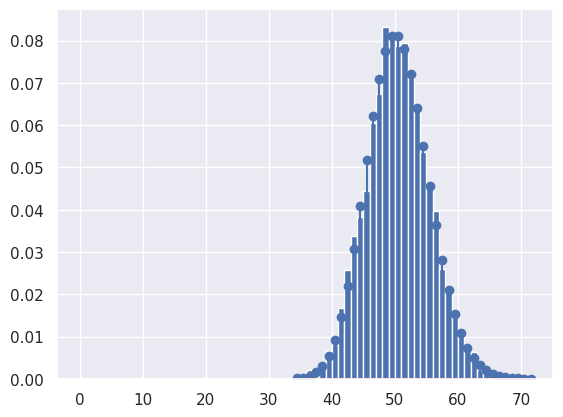

In [299]:
n = 4000
p = 0.8
K = 50
g2 = Graph().Watts_Strogatz_model(n, K, 1)


degree_sequence = sorted([d for n, d in g2.degree()], reverse=True)  # degree sequence
xs = np.arange(min(degree_sequence), max(degree_sequence),1)
plt.hist(degree_sequence, density= True, bins=range(max(degree_sequence)))
plt.stem(xs+0.5, density(xs, K, p))
plt.show()

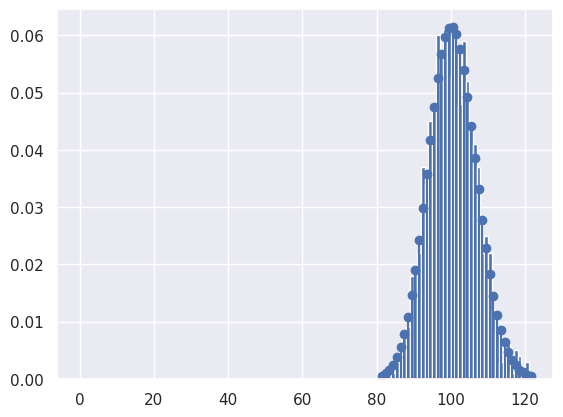

In [332]:
n = 1000
p = 0.6
K = 100
g2 = Graph().Watts_Strogatz_model(n, K, p)


degree_sequence = sorted([d for n, d in g2.degree()], reverse=True)  # degree sequence
xs = np.arange(min(degree_sequence), max(degree_sequence),1)
simulation = plt.hist(degree_sequence, density= True, bins=range(max(degree_sequence)))
plt.stem(xs+0.5, density(xs, K, p))

# degree_sequence = sorted([d for n, d in g2.degree()], reverse=True)  # degree sequence
# xs = np.arange(min(degree_sequence), max(degree_sequence),1)
# plt.plot(xs, binom(n-1,0.5).pmf(xs))
# plt.hist(degree_sequence, density= True, bins=range(max(degree_sequence)))
# plt.stem(xs+0.5, density(xs, K, p))
# plt.show()

plt.show()

(array([101.      ,   0.679291]),
 array([[ 0.00018876, -0.00060322],
        [-0.00060322,  0.00628842]]))

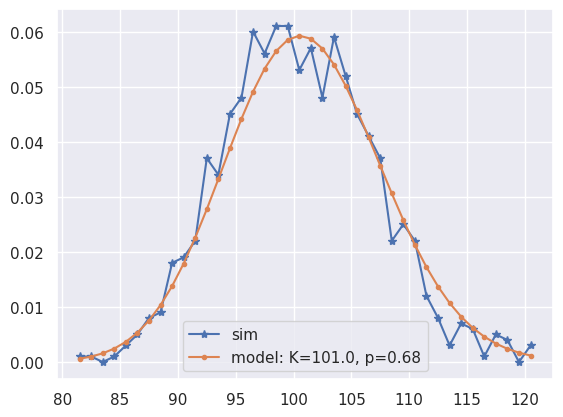

In [333]:

xdata = [0.5 * (simulation[1][i] + simulation[1][i+1]) for i in range(len(simulation[0]))]
ydata = simulation[0]
mean_dg = np.mean(degree_sequence)
std_dg = np.std(degree_sequence)

xdata = xdata[min(degree_sequence):max(degree_sequence)]
ydata = ydata[min(degree_sequence):max(degree_sequence)]

popt, pcov = curve_fit(density, xdata, ydata, p0 = [mean_dg, 0.5],bounds= [[mean_dg - std_dg, 0],[mean_dg + std_dg, 1]])
# popt[0] = int(popt[0])
plt.plot(xdata, ydata, '*-', label='sim')
popt[0] = int(popt[0] + 0.5)
plt.plot(xdata, density(xdata, popt[0], popt[1]), '.-', label=f'model: K=%a, p=%.02f'%(popt[0], popt[1]) )
plt.legend()
popt, pcov

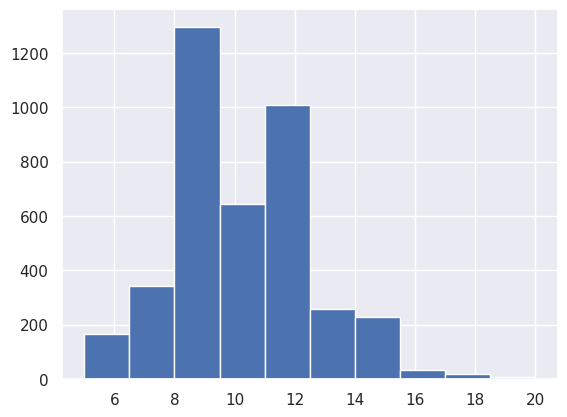

In [163]:
K = 10
p = 0.5

# xdata = np.arange(80, 120,1)
# xdata = sim_x

y = density(xdata, K, p)
# y = sim_y
simulation = plt.hist(degree_sequence)
sim_x = [(simulation[1][i] + simulation[1][i+1])/2 for i in range(len(simulation[1])-1)]
sim_y = simulation[0]


# popt, pcov = curve_fit(density, xdata, y, p0=(98, 0.1), bounds= [(90, 0), (110,1)])
# plt.plot(xdata, y, '*-', label='sim')
# plt.plot(xdata, density(xdata, popt[0], popt[1]), '.-', label='model')
# plt.legend()
# popt, pcov


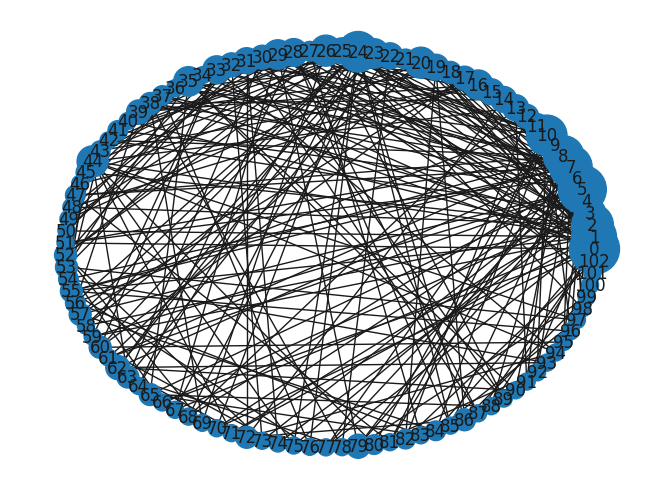

In [438]:
class Graph(nx.Graph):
    
    def Watts_Strogatz_model(self, n , k, p):
        """Returns a Watts–Strogatz small-world graph.

        Parameters
        ----------
        n : int
            The number of nodes
        k : int
            Each node is joined with its `k` nearest neighbors in a ring
            topology.
        p : float
            The probability of rewiring each edge
        """
        if k>n:
            raise ValueError(f"The parameter 'k' = {k} is greater than parametr 'n' = {n}")
        elif k == n:
            return nx.complete_graph(n)
        g = nx.Graph()
        g.add_nodes_from(range(n))
        
        nodes = g.nodes
        for i in range(n):
            for j in range(1, k // 2 + 1):
                g.add_edge(i, (i+j)%n)
                
        for node in nodes:
            for neighbour in range(1, k // 2 + 1):
                if np.random.uniform() < p:
                    random_note = np.random.choice(nodes)
                    while node == random_note or g.has_edge(node, random_note):
                        random_note = np.random.choice(nodes)
                    else:
                        g.remove_edge(node, (node + neighbour)%n)
                        g.add_edge(node, random_note)
                else:
                    pass
        return g

    def barabasi_albert_model(self, m0, n, iterations, inicial_praph = None):
        if inicial_praph:
            g = inicial_praph
        else:
            g = nx.complete_graph(m0)
        degrees = {note:degre for note,degre in g.degree() }
        for node in range(m0, m0 + iterations):
            values = np.array(list(degrees.values()))
            nodes_to_conect = np.random.choice(list(degrees.keys()), size = n, replace=False, p = values/sum(values))
            degrees[node] = n
            for node_to_conect in nodes_to_conect:
                degrees[node_to_conect] += 1
                
            g.add_edges_from([[node, i] for i in nodes_to_conect ])
            # print(node, nodes_to_conect, degrees,np.array(list(degrees.values()))/sum(np.array(list(degrees.values()))))
            # nx.draw_circular(g, with_labels = True, node_size=[v * 50 for v in degrees.values()])

        return g
m0 = 3
n = 3
g3 = Graph().barabasi_albert_model(m0, n, iterations = 100)
nx.draw_circular(g3, with_labels = True, node_size=[v * 50 for v in dict(g3.degree()).values()])

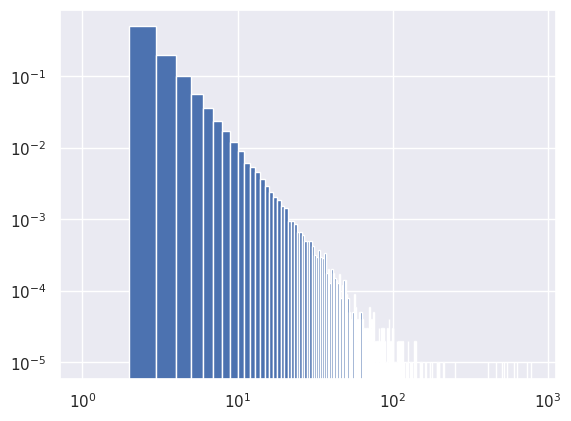

In [474]:

m0 = 10
n = 2
iterations  = 100000
g3 = Graph().barabasi_albert_model(m0, n, iterations = iterations)


degree_sequence = sorted([d for n, d in g3.degree()], reverse=True)  # degree sequence
n, bins, patches = plt.hist(degree_sequence, density= True, bins=range(max(degree_sequence)))

# bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n))]
# plt.clf()
# plt.scatter(bins_mean, n)

plt.yscale("log")
plt.xscale("log")
plt.show()


In [482]:
a,b

(-9.155573472509092e-06, 0.004927354347529627)

/tmp/ipykernel_335682/2723959672.py:7: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(bins_mean_tail), np.log(n_tail))
/tmp/ipykernel_335682/2723959672.py:8: RuntimeWarning: divide by zero encountered in log
  a,b = np.polyfit(np.log(bins_mean_tail), np.log(n_tail), 1)
/tmp/ipykernel_335682/2723959672.py:9: RuntimeWarning: divide by zero encountered in log
  idx = np.isfinite(np.log(bins_mean_tail)) & np.isfinite(np.log(n_tail))
/tmp/ipykernel_335682/2723959672.py:10: RuntimeWarning: divide by zero encountered in log
  a,b = np.polyfit(np.log(bins_mean_tail)[idx], np.log(n_tail)[idx], 1)


array([0.05324823, 8.55325386])

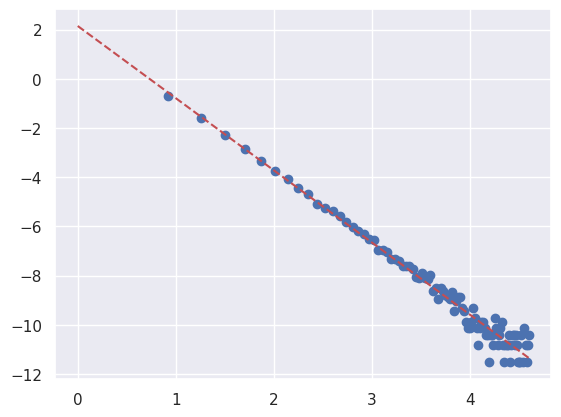

In [550]:
bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n))]
tail = 100
bins_mean_tail = bins_mean[:tail]
n_tail = n[:tail]

# plt.clf()
plt.scatter(np.log(bins_mean_tail), np.log(n_tail))
a,b = np.polyfit(np.log(bins_mean_tail), np.log(n_tail), 1)
idx = np.isfinite(np.log(bins_mean_tail)) & np.isfinite(np.log(n_tail))
a,b = np.polyfit(np.log(bins_mean_tail)[idx], np.log(n_tail)[idx], 1)
xs = np.linspace(0,max(np.log(bins_mean_tail)),100)
ys = a*xs+b
plt.plot(xs, ys, "r--")
np.exp((a,b))

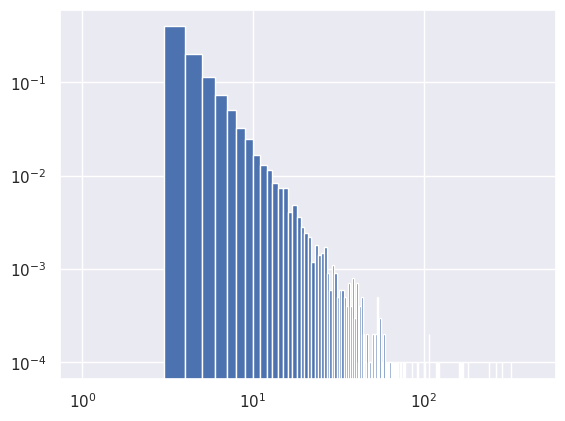

In [551]:

m0 = 10
n = 3
iterations  = 10000
g3 = Graph().barabasi_albert_model(m0, n, iterations = iterations)


degree_sequence = sorted([d for n, d in g3.degree()], reverse=True)  # degree sequence
n, bins, patches = plt.hist(degree_sequence, density= True, bins=range(max(degree_sequence)))

# bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n))]
# plt.clf()
# plt.scatter(bins_mean, n)

plt.yscale("log")
plt.xscale("log")
plt.show()


/tmp/ipykernel_335682/2813743175.py:7: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(bins_mean_tail), np.log(n_tail))
/tmp/ipykernel_335682/2813743175.py:8: RuntimeWarning: divide by zero encountered in log
  a,b = np.polyfit(np.log(bins_mean_tail), np.log(n_tail), 1)
/tmp/ipykernel_335682/2813743175.py:9: RuntimeWarning: divide by zero encountered in log
  idx = np.isfinite(np.log(bins_mean_tail)) & np.isfinite(np.log(n_tail))
/tmp/ipykernel_335682/2813743175.py:10: RuntimeWarning: divide by zero encountered in log
  a,b = np.polyfit(np.log(bins_mean_tail)[idx], np.log(n_tail)[idx], 1)


(-2.7661748709729292, 2.3983105665966575)

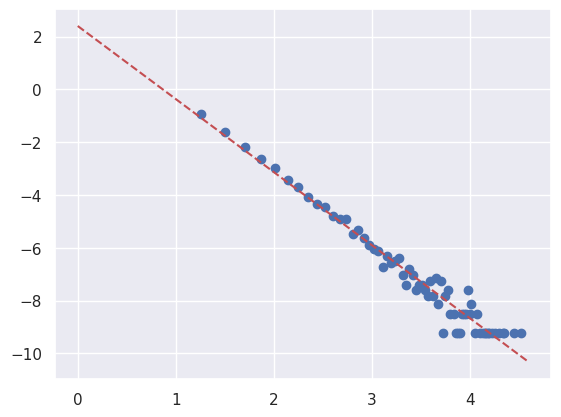

In [586]:
bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n))]
tail = 100
bins_mean_tail = bins_mean[:tail]
n_tail = n[:tail]

# plt.clf()
plt.scatter(np.log(bins_mean_tail), np.log(n_tail))
a,b = np.polyfit(np.log(bins_mean_tail), np.log(n_tail), 1)
idx = np.isfinite(np.log(bins_mean_tail)) & np.isfinite(np.log(n_tail))
a,b = np.polyfit(np.log(bins_mean_tail)[idx], np.log(n_tail)[idx], 1)
xs = np.linspace(0,max(np.log(bins_mean_tail)),100)
ys = a*xs+b
plt.plot(xs, ys, "r--")
a,b

/tmp/ipykernel_335682/3101819045.py:9: RuntimeWarning: divide by zero encountered in log
  idx = np.isfinite(np.log(bins_mean_tail)) & np.isfinite( np.log(n_tail))
/tmp/ipykernel_335682/3101819045.py:10: RuntimeWarning: divide by zero encountered in log
  a,b = np.polyfit(np.log(bins_mean_tail)[idx], np.log(n_tail)[idx], 1)
/tmp/ipykernel_335682/3101819045.py:12: RuntimeWarning: divide by zero encountered in power
  ys = np.exp(b)*xs**a


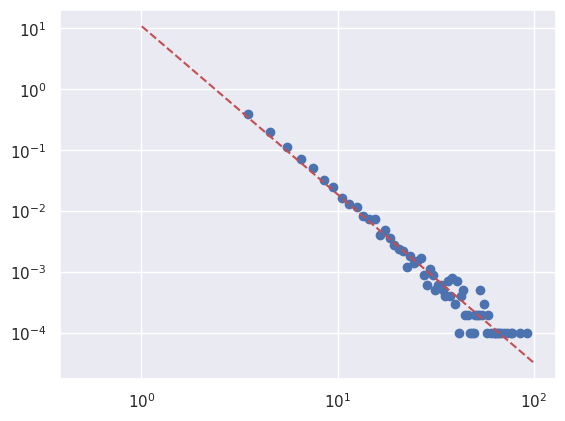

(-2.7661748709729292, 2.3983105665966575)

In [588]:
bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n))]
tail = 100
bins_mean_tail = bins_mean[:tail]
n_tail = n[:tail]

# plt.clf()
plt.scatter(bins_mean_tail, n_tail)
# a,b = np.polyfit(np.log(bins_mean_tail), np.log(n_tail), 1)
idx = np.isfinite(np.log(bins_mean_tail)) & np.isfinite( np.log(n_tail))
a,b = np.polyfit(np.log(bins_mean_tail)[idx], np.log(n_tail)[idx], 1)
xs = np.linspace(0,max(bins_mean_tail),100)
ys = np.exp(b)*xs**a
plt.plot(xs, ys, "r--")
# np.exp((a,b))
plt.xscale("log")
plt.yscale("log")
plt.show()
a,b

## Watts-Strogatz model

In [ ]:
import networkx as nx
import numpy as np

class Graph(nx.Graph):
    
    def random_graph(self, n, p):
        eges_nr = np.sum([i for i in range(n)])
        edges = np.array([[i, j] for i in range(n-1) for j in range(i+1,n) if np.random.uniform() < p ])
        # all_edges = np.array([[i, j] for i in range(n-1) for j in range(i+1,n)])
        # taked_edes = np.random.uniform(size=eges_nr)<p
        # edges_to_add = all_edges[taked_edes]
        self.add_nodes_from(range(n))
        # self.add_edges_from(edges_to_add)
        self.add_edges_from(edges)
        return self
    
    def Watts_Strogatz_model(self, n , k, p):
        """Returns a Watts–Strogatz small-world graph.

        Parameters
        ----------
        n : int
            The number of nodes
        k : int
            Each node is joined with its `k` nearest neighbors in a ring
            topology.
        p : float
            The probability of rewiring each edge
        """
        if k>n:
            raise ValueError(f"The parameter 'k' = {k} is greater than parametr 'n' = {n}")
        elif k == n:
            return nx.complete_graph(n)
        # g = nx.Graph()
        self.add_nodes_from(range(n))
        
        nodes = self.nodes
        for i in range(n):
            for j in range(1, k // 2 + 1):
                self.add_edge(i, (i+j)%n)
                
        for node in nodes:
            for neighbour in range(1, k // 2 + 1):
                if np.random.uniform() < p:
                    random_note = np.random.choice(nodes)
                    while node == random_note or self.has_edge(node, random_note):
                        random_note = np.random.choice(nodes)
                    else:
                        self.remove_edge(node, (node + neighbour)%n)
                        self.add_edge(node, random_note)
                else:
                    pass
        return self
    
    def degree_sequence(self) -> list:
        degree_list = [d for n, d in self.degree()]
        return sorted(degree_list, reverse=True)


In [ ]:
def density(k, K, p):
    pk = 0
    for n in range(min(k - K//2, K//2)+1):
        C_nk = np.math.factorial(K//2)/(np.math.factorial(n)*np.math.factorial(K//2-n))
        pk += C_nk*(1-p)**n*p**(K/2-n)*(p*K/2)**(k-n-K/2)/np.math.factorial(k-n-K//2)*np.math.exp(-K//2*p)
    return pk

In [ ]:
n = 4000
p = 1
K = 10
g2 = Graph().Watts_Strogatz_model(n, K, 1)


degree_sequence = g2.degree_sequence()
xs = np.arange(min(degree_sequence), max(degree_sequence),1)
plt.plot(xs, binom(n-1,0.5).pmf(xs))
plt.hist(degree_sequence, density= True, bins=range(max(degree_sequence)))
xs = np.arange(min(degree_sequence), max(degree_sequence),1)
plt.stem(xs+0.5, [density(k, K, p) for k in xs])
plt.show()

In [ ]:
print(f"""
nodes = {len(g2.nodes)},
edges = {len(g2.edges)},
mean degre = {np.mean(degree_sequence)},
VAR degre = {np.var(degree_sequence)}""")

### Barabasi-Albert model

In [ ]:
import networkx as nx
import numpy as np

class Graph(nx.Graph):
    
    def random_graph(self, n, p):
        eges_nr = np.sum([i for i in range(n)])
        edges = np.array([[i, j] for i in range(n-1) for j in range(i+1,n) if np.random.uniform() < p ])
        # all_edges = np.array([[i, j] for i in range(n-1) for j in range(i+1,n)])
        # taked_edes = np.random.uniform(size=eges_nr)<p
        # edges_to_add = all_edges[taked_edes]
        self.add_nodes_from(range(n))
        # self.add_edges_from(edges_to_add)
        self.add_edges_from(edges)
        return self
    
    def Watts_Strogatz_model(self, n , k, p):
        """Returns a Watts–Strogatz small-world graph.

        Parameters
        ----------
        n : int
            The number of nodes
        k : int
            Each node is joined with its `k` nearest neighbors in a ring
            topology.
        p : float
            The probability of rewiring each edge
        """
        if k>n:
            raise ValueError(f"The parameter 'k' = {k} is greater than parametr 'n' = {n}")
        elif k == n:
            return nx.complete_graph(n)
        # g = nx.Graph()
        self.add_nodes_from(range(n))
        
        nodes = self.nodes
        for i in range(n):
            for j in range(1, k // 2 + 1):
                self.add_edge(i, (i+j)%n)
                
        for node in nodes:
            for neighbour in range(1, k // 2 + 1):
                if np.random.uniform() < p:
                    random_note = np.random.choice(nodes)
                    while node == random_note or self.has_edge(node, random_note):
                        random_note = np.random.choice(nodes)
                    else:
                        self.remove_edge(node, (node + neighbour)%n)
                        self.add_edge(node, random_note)
                else:
                    pass
        return self

    def barabasi_albert_model(self, m0, n, iterations, inicial_praph = None):
        if inicial_praph:
            g = inicial_praph
        else:
            g = nx.complete_graph(m0)
        degrees = {note:degre for note,degre in g.degree() }
        for node in range(m0, m0 + iterations):
            values = np.array(list(degrees.values()))
            nodes_to_conect = np.random.choice(list(degrees.keys()), size = n, replace=False, p = values/sum(values))
            degrees[node] = n
            for node_to_conect in nodes_to_conect:
                degrees[node_to_conect] += 1
            g.add_edges_from([[node, i] for i in nodes_to_conect ])
        return g
        
    def degree_sequence(self) -> list:
        degree_list = [d for n, d in self.degree()]
        return sorted(degree_list, reverse=True)


In [ ]:

m0 = 10
n = 2
iterations  = 10000
g3 = Graph().barabasi_albert_model(m0, n, iterations = iterations)


degree_sequence = sorted([d for n, d in g3.degree()], reverse=True)  # degree sequence
n, bins, patches = plt.hist(degree_sequence, density= True, bins=range(max(degree_sequence)))
plt.yscale("log")
plt.xscale("log")
plt.show()

In [ ]:
bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n))]
tail = 100
bins_mean_tail = bins_mean[:tail]
n_tail = n[:tail]

plt.scatter(bins_mean_tail, n_tail)
ln_bins_mean_tail = np.log(bins_mean_tail)
ln_n_tail = np.log(n_tail)
idx = np.isfinite(ln_bins_mean_tail) & np.isfinite( ln_n_tail )

a,b = np.polyfit(ln_bins_mean_tail[idx], ln_n_tail[idx], 1)
xs = np.linspace(0,max(bins_mean_tail),100)
ys = np.exp(b)*xs**a
plt.plot(xs, ys, "r--" , label = f"exp({b})x^{a}")

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()


In [ ]:
print(f"""
nodes = {len(g3.nodes)},
edges = {len(g3.edges)},
mean degre = {np.mean(degree_sequence)},
VAR degre = {np.var(degree_sequence)}""")

In [1]:
pip install selenium


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 6.1 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 13.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# zad 2

In [1]:
import getpass
import keyring

In [19]:
my_email = "olek10295@wp.pl"
fb_name = input("Imput your Facebook profile name") #ex olek jakobczyk

keyring.set_password('facebook', 'password', getpass.getpass())

In [16]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import time
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

path_to_chrome_driver = "chromedriver_v112"
driver = webdriver.Chrome(path_to_chrome_driver)
driver.get("https://www.facebook.com/")


accept_cookies_button = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable(
        (By.CSS_SELECTOR, 'button[data-testid="cookie-policy-manage-dialog-accept-button"]')
    )
)

accept_cookies_button.click()

user_css_selector = "input[name='email']"
password_css_selector = "input[name='pass']"

username_input = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.CSS_SELECTOR, user_css_selector))
)
password_input = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.CSS_SELECTOR, password_css_selector))
)

username_input.clear()
username_input.send_keys(my_email)
password_input.clear()
password_input.send_keys(keyring.get_password('facebook', 'password'))

/tmp/ipykernel_40916/433880737.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path_to_chrome_driver)


In [17]:
WebDriverWait(driver, 2).until(
    EC.element_to_be_clickable((By.CSS_SELECTOR, "button[type='submit']"))
).click()

In [18]:
time.sleep(2)
driver.get("https://www.facebook.com/friends/list")

In [25]:
time.sleep(2)
driver.get("https://www.facebook.com/profile")
# # time.sleep(2)
# driver.get(driver.current_url + "friends")


In [23]:
driver.get("https://www.facebook.com/profile")


'https://www.facebook.com/olek.jakobczyk/'

In [6]:
import requests

session = requests.session()
session.cookies.update({
    cookie["name"]: cookie["value"]
    for cookie in driver.get_cookies()
})

In [7]:
import json
import re

pattern = r'\["DTSGInitData",\[\],{"token":"\S+","async_get_token":"\S+?"},\d+\]'
match = re.search(pattern, driver.page_source)
fb_dtsg_token = json.loads(match.group())[2]["token"]

In [8]:
import urllib

url = 'https://www.facebook.com/api/graphql/'

headers = {
    "accept": "*/*",
    "accept-language": "es-ES,es;q=0.9",
    "content-type": "application/x-www-form-urlencoded",
    "sec-ch-ua": "\" Not;A Brand\";v=\"99\", \"Google Chrome\";v=\"91\", \"Chromium\";v=\"91\"",
    "sec-ch-ua-mobile": "?0",
    "sec-fetch-dest": "empty",
    "sec-fetch-mode": "cors",
    "sec-fetch-site": "same-origin",
    "x-fb-friendly-name": "FriendingCometFriendsListPaginationQuery",
    "referrer": "https://www.facebook.com/friends/list",
    "referrerPolicy": "strict-origin-when-cross-origin",
}

response = session.post(
    url,
    headers=headers,
    data=urllib.parse.urlencode(
        {
            "fb_dtsg": fb_dtsg_token,
            "fb_api_req_friendly_name": "FriendingCometFriendsListPaginationQuery",
            "variables": json.dumps(
                {
                    "count": 30,
                    "cursor": None,
                    "scale": 1,
                }
            ).replace(" ", ""),
            "doc_id": 4268740419836267,
        }
    )
)

In [9]:
response_dict = json.loads(response.content)
friend_objects = response_dict["data"]["viewer"]["all_friends"]["edges"]

friends = [
    dict(
        user_id=str(friend["node"]["id"]),
        name=friend['node']['name'],
        link=friend['node']['url'],
        gender=friend['node']['gender']
    )
    for friend in friend_objects
    if friend["node"]["__typename"] == "User"
]



In [10]:
page_info = dict(has_next_page=True, end_cursor=None)

url = 'https://www.facebook.com/api/graphql/'

headers = {
    "accept": "*/*",
    "accept-language": "es-ES,es;q=0.9",
    "content-type": "application/x-www-form-urlencoded",
    "sec-ch-ua": "\" Not;A Brand\";v=\"99\", \"Google Chrome\";v=\"91\", \"Chromium\";v=\"91\"",
    "sec-ch-ua-mobile": "?0",
    "sec-fetch-dest": "empty",
    "sec-fetch-mode": "cors",
    "sec-fetch-site": "same-origin",
    "x-fb-friendly-name": "FriendingCometFriendsListPaginationQuery",
    "referrer": "https://www.facebook.com/friends/list",
    "referrerPolicy": "strict-origin-when-cross-origin",
}

friends = []

while page_info["has_next_page"]:
    response = session.post(
        url,
        headers=headers,
        data=urllib.parse.urlencode(
            {
                "fb_dtsg": fb_dtsg_token,
                "fb_api_req_friendly_name": "FriendingCometFriendsListPaginationQuery",
                "variables": json.dumps(
                    {
                        "count": 30,
                        "cursor": page_info["end_cursor"],
                        "scale": 1,
                    }
                ).replace(" ", ""),
                "doc_id": 4268740419836267,
            }
        )
    )
    
    response_dict = json.loads(response.content)
    friend_objects = response_dict["data"]["viewer"]["all_friends"]["edges"]

    friends += [
        dict(
            user_id=str(friend["node"]["id"]),
            name=friend['node']['name'],
            link=friend['node']['url'],
            gender=friend['node']['gender']
        )
        for friend in friend_objects
        if friend["node"]["__typename"] == "User"
    ]
    
    page_info = response_dict["data"]["viewer"]["all_friends"]["page_info"]
    
print(f"Number of friends: {len(friends)}")

Number of friends: 372


In [11]:
friends

[{'user_id': '100001857244620',
  'name': 'Maja Jakóbczyk',
  'link': 'https://www.facebook.com/maja.jakobczyk',
  'gender': 'FEMALE'},
 {'user_id': '100002680203675',
  'name': 'Krzysiu Rybak',
  'link': 'https://www.facebook.com/krzysztof.rybak.9',
  'gender': 'MALE'},
 {'user_id': '100004444233530',
  'name': 'Kasia Gunia',
  'link': 'https://www.facebook.com/kasia.gunia5',
  'gender': 'FEMALE'},
 {'user_id': '100007395847308',
  'name': 'Sebastian Janus',
  'link': 'https://www.facebook.com/sebastianj2031',
  'gender': 'MALE'},
 {'user_id': '100015204700885',
  'name': 'Asia Wojciechowicz',
  'link': 'https://www.facebook.com/asia.wojciechowicz.1',
  'gender': 'FEMALE'},
 {'user_id': '100006623141881',
  'name': 'Krystian Walewski',
  'link': 'https://www.facebook.com/krystian.walewski',
  'gender': 'MALE'},
 {'user_id': '100005921622797',
  'name': 'Jakub Koral',
  'link': 'https://www.facebook.com/jakub.jj.koral',
  'gender': 'MALE'},
 {'user_id': '100008726388486',
  'name': 'Ad

In [12]:
friend = friends[0]

profile_link = friend["link"]

url_parsed = urllib.parse.urlparse(profile_link)

if url_parsed.path == "/profile.php":
    mutual_friends_link =  f"{profile_link}&sk=friends_mutual"
else:
    mutual_friends_link = f"{profile_link}/friends_mutual"
    
driver.get(mutual_friends_link)
time.sleep(1.5)

In [13]:
from selenium.webdriver.common.keys import Keys

# loading_mutual_friends_panel_class = "lzcic4wl j83agx80 btwxx1t3 lhclo0ds i1fnvgqd"
# loading_mutual_friends_panel_selector = f"div[role='progressbar'][data-visualcompletion='loading-state']"
loading_mutual_friends_panel_selector = "div[data-pagelet*='ProfileAppSection']"
# loading_element = driver.find_elements_by_css_selector(
#     loading_mutual_friends_panel_selector
# )

loading_element = driver.find_elements(By.CSS_SELECTOR, loading_mutual_friends_panel_selector)
loading_element = driver.find_elements(By.CSS_SELECTOR,
        "div[data-pagelet*='ProfileAppSection']"
        )
# while len(loading_element) > 0:
#     driver.find_element_by_xpath('//body').send_keys(Keys.END)
#     time.sleep(0.5)
#     loading_element = driver.find_element(By.CSS_SELECTOR,
#         loading_mutual_friends_panel_selector
    # )
while len(loading_element) == 1:
    driver.find_element(By.XPATH, '//body').send_keys(Keys.END)
    time.sleep(0.5)
    # loading_element = driver.find_elements(By.CSS_SELECTOR,
    #     loading_mutual_friends_panel_selector
    # )
    loading_element = driver.find_elements(By.CSS_SELECTOR,
        loading_mutual_friends_panel_selector
        )

In [146]:
mutual_friends_panel_selector = "div[data-pagelet='ProfileAppSection_0']"

mutual_friends_pannel = driver.find_element(By.CSS_SELECTOR,
    mutual_friends_panel_selector
)

In [183]:
mutual_friend_link_class = (
    "oajrlxb2 g5ia77u1 qu0x051f esr5mh6w e9989ue4 r7d6kgcz rq0escxv"
    " nhd2j8a9 nc684nl6 p7hjln8o kvgmc6g5 cxmmr5t8 oygrvhab hcukyx3x"
    " jb3vyjys rz4wbd8a qt6c0cv9 a8nywdso i1ao9s8h esuyzwwr f1sip0of lzcic4wl gmql0nx0 gpro0wi8"
)

mutual_friend_link_selector = f"a[class='{mutual_friend_link_class}']"

mutual_friend_links = mutual_friends_pannel.find_elements(By.XPATH,
   "//div[@data-pagelet='ProfileAppSection_0']//a[contains(@href, '://www.facebook.')][@tabindex='0'][not(contains(@href,'friends'))]"
)

print(f"Number of mutual friends with {friend['name']}: {len(mutual_friend_links)}")

Number of mutual friends with Maja Jakóbczyk: 51


In [184]:
mutual_friends = []
for link in mutual_friend_links:
    name = link.text
    link = link.get_attribute("href")
    mutual_friends.append(
        dict(
            name=name,
            link=link
        )
    )

In [186]:
mutual_friends

[{'name': 'Agata Wiencek', 'link': 'https://www.facebook.com/agata.wiencek'},
 {'name': 'Agnieszka Radefeld',
  'link': 'https://www.facebook.com/agnieszka.ostrowska.927'},
 {'name': 'Aldona Gasztych',
  'link': 'https://www.facebook.com/profile.php?id=100018078818463'},
 {'name': 'Alina Krupicka',
  'link': 'https://www.facebook.com/profile.php?id=100004537306873'},
 {'name': 'Anna Grabny', 'link': 'https://www.facebook.com/anngi3d'},
 {'name': 'Anna Wąsala', 'link': 'https://www.facebook.com/anna.wasala.52'},
 {'name': 'Bartek Kempa', 'link': 'https://www.facebook.com/bartek.kempa.71'},
 {'name': 'Bartłomiej Kaczmarzyk',
  'link': 'https://www.facebook.com/bartlomiejkaczmarzyk'},
 {'name': 'Dagmara Miś', 'link': 'https://www.facebook.com/dagmara.mis.1'},
 {'name': 'Diana Krupa', 'link': 'https://www.facebook.com/diana.krupa.1'},
 {'name': 'Dominik Gajewski',
  'link': 'https://www.facebook.com/dominik.gajewski.11'},
 {'name': 'Emilia Kucharska',
  'link': 'https://www.facebook.com/em

In [152]:
mutual_friends

[]

# V2

In [1]:
import getpass
import keyring
my_email = "olek10295@wp.pl"
keyring.set_password('facebook', 'password', getpass.getpass("Facebook password"))

In [1]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import time
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from collections import deque
from csv import DictWriter, writer

path_to_chrome_driver = "chromedriver_v112"

option = Options()

option.add_argument("--disable-infobars")
option.add_argument("start-maximized")
option.add_argument("--disable-extensions")
option.add_experimental_option(
    "prefs", {"profile.default_content_setting_values.notifications": 2}
)


In [3]:
driver = webdriver.Chrome(path_to_chrome_driver, chrome_options=option)
driver.get("https://www.facebook.com/")
accept_cookies_button = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable(
        (By.XPATH, '//button[@data-testid="cookie-policy-manage-dialog-accept-button"]')
    )
)

accept_cookies_button.click()

/tmp/ipykernel_34505/2543026269.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path_to_chrome_driver, chrome_options=option)
/tmp/ipykernel_34505/2543026269.py:1: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(path_to_chrome_driver, chrome_options=option)


In [4]:

user_xpath_selector = "//input[@name='email']"
password_xpath_selector = "//input[@name='pass']"

username_input = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, user_xpath_selector))
)
password_input = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, password_xpath_selector))
)

username_input.clear()
username_input.send_keys(my_email)
password_input.clear()
password_input.send_keys(keyring.get_password('facebook', 'password'))
WebDriverWait(driver, 2).until(
    EC.element_to_be_clickable((By.XPATH, "//button[@type='submit']"))
).click()



In [5]:
time.sleep(2)
driver.get("https://www.facebook.com/profile")
my_fb_name = WebDriverWait(driver, 2).until(
    EC.element_to_be_clickable((By.XPATH, "//h1"))
).text

In [6]:
def get_friend_from_link(driver, link:list[dict['name':str, 'link':str]]) -> list:
    try:
        driver.get(link)
        loading_mutual_friends_panel_xpath = "//div[contains(@data-pagelet,'ProfileAppSection')]"

        loading_element = driver.find_elements(By.XPATH, loading_mutual_friends_panel_xpath)
        loading_element = driver.find_elements(By.XPATH,
                "//div[contains(@data-pagelet, 'ProfileAppSection')]"
                )

        while len(loading_element) == 1:
            driver.find_element(By.XPATH, '//body').send_keys(Keys.END)
            time.sleep(0.5)
            loading_element = driver.find_elements(By.XPATH,
                loading_mutual_friends_panel_xpath
                )
        friends_panel_xpath = "//div[@data-pagelet='ProfileAppSection_0']"

        friends_pannel = driver.find_element(By.XPATH,
            friends_panel_xpath
        )

        friend_links = friends_pannel.find_elements(By.XPATH,
        "//div[@data-pagelet='ProfileAppSection_0']//a[contains(@href, '://www.facebook.')][@tabindex='0'][not(contains(@href,'friends'))]"
        )

        friends = [{"name": link.text, "link":link.get_attribute("href")} for link in friend_links]
        return friends
    except:
        return None

In [16]:
from csv import DictWriter, writer
people_field_names = ['ID', 'NAME', 'LINK']
friends_field_names = ['PERSOn 1 ID', 'PERSOn 2 ID']



In [250]:

with open('people.csv', 'w') as f_people, open('friends.csv', 'w') as f_friends:
    people_writer = DictWriter(f_people, fieldnames=people_field_names)
    friends_writer = DictWriter(f_friends, fieldnames=friends_field_names)
    people_writer.writeheader()
    friends_writer.writeheader()

In [3]:
import pandas as pd
people_df = pd.read_csv("people.csv")
friends_df = pd.read_csv("friends.csv")

# linkt_to_check = deque()
# for i in list(people_df["LINK"][32:]):
#     linkt_to_check.append(i)
    
# iterations = 27
# all_peoples = [i for i in people_df["LINK"]]
# id = 11419

In [17]:
# linkt_to_check = deque()
# linkt_to_check.append(driver.current_url[:-1])
# iterations = 0
# max_iterations = 1
# all_peoples = []
# id = 0
with open('people.csv', 'a') as f_people, open('friends.csv', 'a') as f_friends:
    people_writer = writer(f_people)
    friends_writer = writer(f_friends)
    # people_writer.writerow([str(id), my_fb_name, driver.current_url[:-1]])
    # id+=1
    while True:
    # while iterations < max_iterations:
    
        link = linkt_to_check.popleft()
        link_to_friends = link + "/friends"
        friends_list = get_friend_from_link(driver, link_to_friends)
        if friends_list is None:
            continue
        for friend in friends_list:
            friend_link = friend["link"]
            friends_writer.writerow([link, friend_link])
            if friend not in all_peoples:
                all_peoples.append(friend)
                linkt_to_check.append(friend_link)
                people_writer.writerow([str(id), friend["name"], friend_link])
                id+=1
        iterations+=1

,ID,NAME,LINK
0,0,Olek Jakóbczyk,https://www.facebook.com/olek.jakobczyk
1,1,Maja Jakóbczyk,https://www.facebook.com/maja.jakobczyk
2,2,Krzysiu Rybak,https://www.facebook.com/krzysztof.rybak.9
3,3,Kasia Gunia,https://www.facebook.com/kasia.gunia5
4,4,Sebastian Janus,https://www.facebook.com/sebastianj2031


In [2]:
list(people_df["LINK"][32:])

NameError: name 'people_df' is not defined

In [4]:
friends_df.head()

,PERSOn 1 ID,PERSOn 2 ID
0,https://www.facebook.com/olek.jakobczyk,https://www.facebook.com/maja.jakobczyk
1,https://www.facebook.com/olek.jakobczyk,https://www.facebook.com/krzysztof.rybak.9
2,https://www.facebook.com/olek.jakobczyk,https://www.facebook.com/kasia.gunia5
3,https://www.facebook.com/olek.jakobczyk,https://www.facebook.com/sebastianj2031
4,https://www.facebook.com/olek.jakobczyk,https://www.facebook.com/asia.wojciechowicz.1


In [264]:
edges_df = friends_df.applymap(lambda x : people_df[people_df["LINK"] == x].first_valid_index())
edges_df.head()
edges_df.to_csv("edges_index.csv")

In [255]:
import networkx as nx
g = nx.from_pandas_edgelist(edges_df, "PERSOn 1 ID", "PERSOn 2 ID")

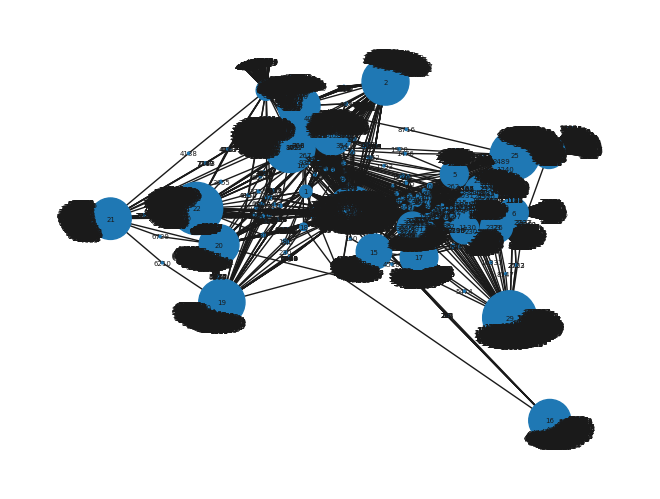

In [256]:
nx.draw(g, with_labels = True, node_size=[v * 1.5 for v in dict(g.degree()).values()], font_size = 5)

#### celebrity

In [258]:
sort_degree_centrality = sorted(nx.degree_centrality(g).items(), key=lambda x:x[1], reverse=True)
sort_degree_centrality

[(29, 0.08837698169396514),
 (22, 0.08242095121310326),
 (4, 0.0758517999474468),
 (25, 0.07357449417535254),
 (27, 0.06718052027678025),
 (2, 0.06665498817552773),
 (19, 0.06464044845405974),
 (24, 0.05369186301129894),
 (16, 0.0533415082771306),
 (21, 0.0520276780239993),
 (20, 0.04782342121397916),
 (10, 0.04642200227730577),
 (17, 0.042830866252080234),
 (15, 0.0379258999737234),
 (3, 0.033634054480161164),
 (0, 0.03267057896119822),
 (9, 0.03161951475869318),
 (23, 0.03109398265744066),
 (8, 0.028291144784093895),
 (6, 0.026189016379083822),
 (7, 0.025488306910747133),
 (5, 0.023648944556363318),
 (28, 0.019357099062801086),
 (13, 0.011912060961723746),
 (1, 0.004554611544188491),
 (30, 0.002627660506262591),
 (18, 0.0017517736708417273),
 (26, 0.001226241569589209),
 (33, 0.0011386528860471228),
 (35, 0.0011386528860471228),
 (42, 0.0011386528860471228),
 (210, 0.0011386528860471228),
 (1123, 0.0011386528860471228),
 (1129, 0.0011386528860471228),
 (101, 0.0010510642025050364),
 

### # friend paradox

In [259]:
import numpy as np

In [260]:
degree = g.degree()
np.mean([degree[node] < np.mean([degree[neighbor] for neighbor in  g.neighbors(node)]) for node in g.nodes]) #aprox1

0.9978980557015239

#### degre dist

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

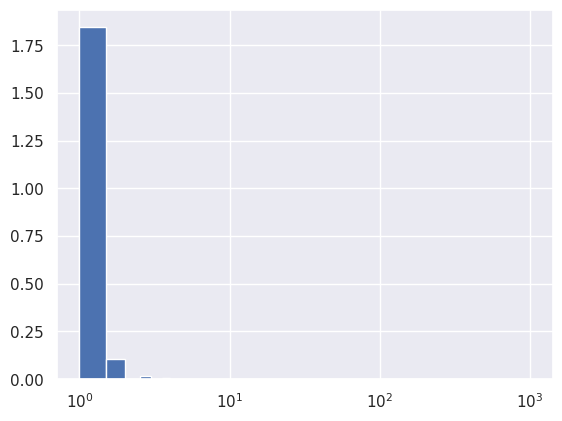

In [262]:
degree_list = [d for n, d in g.degree()]
degree_sequence = sorted(degree_list, reverse=True)

plt.hist(degree_sequence, density= True, bins= 2000)
plt.xscale("log")
plt.show()

#### communication bottlenecks

In [263]:
sort_betweenness_centrality = sorted(nx.betweenness_centrality(g).items(), key=lambda x:x[1], reverse=True)
sort_betweenness_centrality

[(0, 0.5948165206103734),
 (29, 0.1644835795294022),
 (22, 0.1382976451366044),
 (4, 0.1373868802314828),
 (25, 0.12883194198388082),
 (19, 0.11762189915499964),
 (27, 0.11648235008707296),
 (2, 0.11633874459637847),
 (16, 0.10251507344774531),
 (21, 0.09701507143305746),
 (24, 0.09552188463112038),
 (10, 0.07749853791672422),
 (17, 0.0755698625599872),
 (20, 0.07418076701638493),
 (15, 0.06758055753078016),
 (3, 0.05980816107864527),
 (9, 0.05812928994702778),
 (23, 0.05238254536134116),
 (8, 0.047054517113693746),
 (7, 0.04299670397290161),
 (6, 0.04103061897187475),
 (5, 0.03511173708541329),
 (28, 0.027775237284832246),
 (13, 0.022021326753989254),
 (1, 0.013784159022372976),
 (34, 0.006942958611041561),
 (8716, 0.0033789757005475195),
 (1026, 0.0032817667227615596),
 (1123, 0.0030558329597962413),
 (1129, 0.0030558329597962413),
 (6210, 0.0029799573721868825),
 (3655, 0.002707508707953714),
 (1189, 0.0026755575823224397),
 (33, 0.0023527243236009204),
 (35, 0.0023527243236009204),